In [14]:
%pip install supabase

Note: you may need to restart the kernel to use updated packages.


In [27]:
from supabase import create_client,client
from dotenv import load_dotenv
import pandas as pd,os


load_dotenv()
supabase = create_client(os.getenv("SUPABASE_URL"),os.getenv("SUPABASE_KEY"))
data = supabase.table("customer_churn").select("*").execute()
df = pd.DataFrame(data.data)
df.head()
df.info()
df.isnull().sum()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   tenure                  1000 non-null   int64  
 2   MonthlyCharges          1000 non-null   float64
 3   TotalCharges            1000 non-null   float64
 4   Churn                   1000 non-null   object 
 5   InternetService         1000 non-null   object 
 6   Contract                1000 non-null   object 
 7   PaymentMethod           1000 non-null   object 
 8   tenure_group            1000 non-null   object 
 9   monthly_charge_segment  1000 non-null   object 
 10  has_internet_service    1000 non-null   int64  
 11  is_multi_line_user      1000 non-null   int64  
 12  contract_type_code      1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


Index(['id', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService', 'Contract', 'PaymentMethod', 'tenure_group',
       'monthly_charge_segment', 'has_internet_service', 'is_multi_line_user',
       'contract_type_code'],
      dtype='object')

In [16]:
!pip install supabase

In [29]:
df['Churn'].value_counts()/len(df)*100

Churn
No     74.0
Yes    26.0
Name: count, dtype: float64

In [31]:
data2 = df.groupby(by = 'Contract')['MonthlyCharges'].mean()

In [32]:
df['tenure'].value_counts()

tenure
1     90
72    52
2     37
3     26
71    25
      ..
55     6
36     6
26     5
39     4
28     3
Name: count, Length: 72, dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

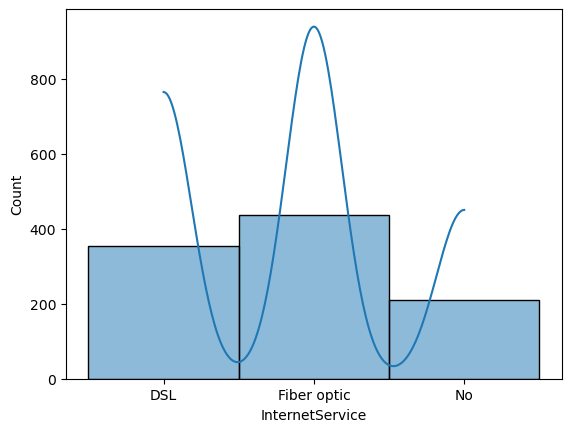

In [35]:
sns.histplot(df['InternetService'], kde=True)
plt.show()

In [37]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'],errors='coerce')

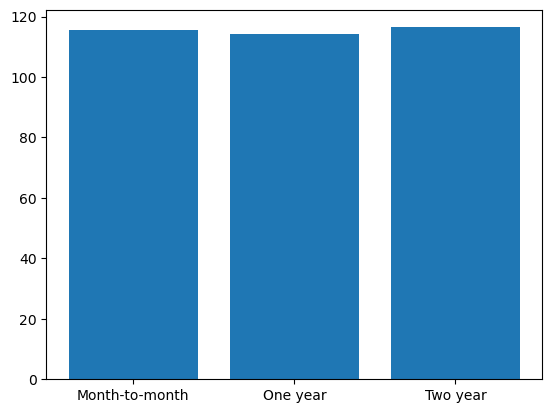

In [38]:
plt.bar(df['Contract'],height=df['MonthlyCharges'])
plt.show()

In [41]:
import pandas as pd

# Assuming df is your transformed dataset
pivot = pd.pivot_table(
    df,
    index='tenure',       # rows
    columns='Churn',      # columns
    # any column to count
    aggfunc='count',      # count number of rows
    fill_value=0          # fill empty cells with 0
)

print(pivot)


       Contract     InternetService     MonthlyCharges     PaymentMethod      \
Churn        No Yes              No Yes             No Yes            No Yes   
tenure                                                                         
1            38  52              38  52             38  52            38  52   
2            11  26              11  26             11  26            11  26   
3            18   8              18   8             18   8            18   8   
4            10  10              10  10             10  10            10  10   
5             9  12               9  12              9  12             9  12   
...         ...  ..             ...  ..            ...  ..           ...  ..   
68           14   2              14   2             14   2            14   2   
69           14   1              14   1             14   1            14   1   
70            9   0               9   0              9   0             9   0   
71           25   0              25   0 